In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from collections import Counter

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
your_path = '/Users/surya/Documents/UoM_Dissertation/'

raw_path = your_path + 'artifacts/data/raw/'
preprocess_path =  your_path + 'artifacts/data/preprocessing/'
staging_path =  your_path + 'artifacts/data/staging/'

prediction_path = your_path + 'artifacts/data/prediction/'

### Finding rows that showed patterns 

In [3]:
def find_rows_with_full_match(filename, target_values):
    matching_row_numbers = []

    try:
        with open(filename, 'r') as file:
            lines = file.readlines()

            for line_number, line in enumerate(lines, start=1):
                words = line.split()
                unique_values = []

                for word in words:
                    try:
                        value = int(word)
                        if value not in unique_values:
                            unique_values.append(value)
                    except ValueError:
                        pass

                unique_values.sort()  # Sort the unique values

                common_values = [value for value in unique_values if value in target_values]
                count_common_values = len(common_values)

                if count_common_values == len(target_values):
                    matching_row_numbers.append(line_number)

    except FileNotFoundError:
        print(f"The file '{filename}' does not exist.")

    return matching_row_numbers

In [4]:
ip_file = staging_path + 'mining_output.txt'

P1 = [12, 14, 52, 60, 62, 70, 76, 85, 86]
index_row_with_P1 = find_rows_with_full_match(ip_file, P1)

P2 = [12, 13, 14, 52, 62, 70, 76, 85, 86]
index_row_with_P2 = find_rows_with_full_match(ip_file, P2)

P3 = [12, 13, 14, 52, 60, 62, 70, 76, 86, 99]
index_row_with_P3 = find_rows_with_full_match(ip_file, P2)

P4 = [12, 13, 14, 52, 60, 62, 70, 76, 85, 86]
index_row_with_P4 = find_rows_with_full_match(ip_file, P2)

P5 = [12, 13, 14, 52, 60, 62, 70, 76, 85, 86, 99]
index_row_with_P5 = find_rows_with_full_match(ip_file, P2)

P6 = [12, 13, 14, 34, 52, 60, 62, 63, 70, 76, 85, 86]
index_row_with_P6 = find_rows_with_full_match(ip_file, P2)

P7 = [12, 13, 14, 34, 52, 59, 60, 62, 63, 70, 76, 86]
index_row_with_P7 = find_rows_with_full_match(ip_file, P2)

# Specify the file path where you want to save the CSV file
csv_file_path1 = prediction_path + "pattern_result1.csv"
csv_file_path2 = prediction_path + "pattern_result2.csv"
csv_file_path3 = prediction_path + "pattern_result3.csv"
csv_file_path4 = prediction_path + "pattern_result4.csv"
csv_file_path5 = prediction_path + "pattern_result5.csv"
csv_file_path6 = prediction_path + "pattern_result6.csv"
csv_file_path7 = prediction_path + "pattern_result7.csv"

# Write the updated_results list to the CSV file
with open(csv_file_path1, "w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Merged Values"])  # Write header
    csv_writer.writerows([[value] for value in index_row_with_P1])

with open(csv_file_path2, "w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Merged Values"])  # Write header
    csv_writer.writerows([[value] for value in index_row_with_P2])

# Write the updated_results list to the CSV file
with open(csv_file_path3, "w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Merged Values"])  # Write header
    csv_writer.writerows([[value] for value in index_row_with_P3])

with open(csv_file_path4, "w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Merged Values"])  # Write header
    csv_writer.writerows([[value] for value in index_row_with_P4])

# Write the updated_results list to the CSV file
with open(csv_file_path5, "w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Merged Values"])  # Write header
    csv_writer.writerows([[value] for value in index_row_with_P5])

with open(csv_file_path6, "w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Merged Values"])  # Write header
    csv_writer.writerows([[value] for value in index_row_with_P6])

# Write the updated_results list to the CSV file
with open(csv_file_path7, "w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Merged Values"])  # Write header
    csv_writer.writerows([[value] for value in index_row_with_P7])


### Finding overall pattern counts

In [5]:
lists = [index_row_with_P1, index_row_with_P2, index_row_with_P3, index_row_with_P4, index_row_with_P5, index_row_with_P6, index_row_with_P7]

# Flatten the lists into a single list
flat_list = [item for sublist in lists for item in sublist]

# Count the occurrences of each unique value
count_dict = Counter(flat_list)

# Create a DataFrame from the count dictionary
df_pattern_count = pd.DataFrame(count_dict.items(), columns=['Value', 'Count'])

df_pattern_count.to_csv(prediction_path + 'patterns_count_list.csv')

### All unique interaction patterns

In [6]:
# Seven lists
alllists = [P1, P2, P3, P4, P5, P6, P7]

# Flatten the lists into a single list
event_list = [item for sublist in alllists for item in sublist]

# Step 2: Get unique values using set
unique_values = set(event_list)

# Convert the set back to a list if needed
unique_list_of_events = list(unique_values)

In [7]:
unique_list_of_events

[34, 99, 70, 12, 76, 14, 13, 52, 85, 86, 59, 60, 62, 63]

### Finding all the users who showed pattern

In [8]:
user_index_pos = pd.read_csv(prediction_path + 'patterns_count_list.csv')
user_index_pos['new_val'] = user_index_pos['Value'] - 1
index_values_count1 = user_index_pos['new_val'].values


In [9]:
index_values_count1

array([ 37,  90, 119, 139, 159, 194, 231, 289, 300, 304, 350, 468, 544,
       582, 641, 680, 681, 685, 691, 740, 741, 766,  32,  41,  85, 179,
       244, 255, 369, 598, 648, 718, 781, 794])

In [10]:
# original_list = [37, 90, 119, 139, 159, 194, 231, 289, 300, 304, 350, 468, 544, 582, 641, 680, 681, 685, 691, 740, 741, 766, 32, 41, 85, 179, 244, 255, 369, 598, 648, 718, 781, 794]
def find_user_pattern_count(index_values_count1):
  itemset_count = 50
  modulus_values = [x % itemset_count for x in index_values_count1]

  value_counts = pd.Series(modulus_values).value_counts().reset_index()
  value_counts.columns = ['Modulus', 'Count']
  sorted_value_counts = value_counts.sort_values(by=['Count','Modulus'])
 
  return sorted_value_counts

In [11]:
combined_list = []

combined_list.extend(index_row_with_P1)
combined_list.extend(index_row_with_P2)
combined_list.extend(index_row_with_P3)
combined_list.extend(index_row_with_P4)
combined_list.extend(index_row_with_P5)
combined_list.extend(index_row_with_P6)
combined_list.extend(index_row_with_P7)

In [12]:
bar_graph = find_user_pattern_count(combined_list)

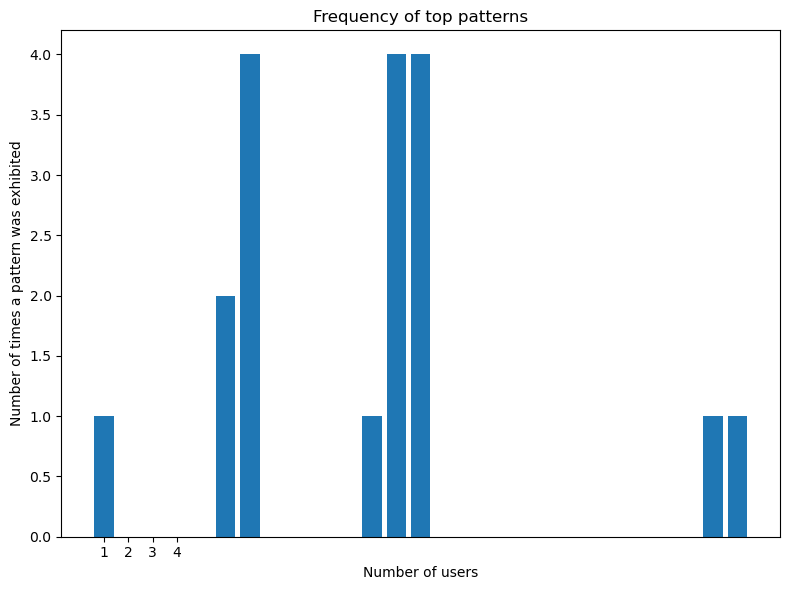

In [13]:
# Calculate the frequency of each unique value in the 'Count' column
value_counts = bar_graph['Count'].value_counts()

# Plotting the bar_graph graph with x and y axes interchanged
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(value_counts.index, value_counts.values)  # Plot the bar_graphs horizontally

# Adding labels and title
plt.xlabel('Number of users')
plt.ylabel('Number of times a pattern was exhibited')
plt.title('Frequency of top patterns')

plt.xticks(range(int(min(value_counts.values)), int(max(value_counts.values)) + 1, 1))

# Display the plot
plt.tight_layout()
plt.show()

### Finding users across each pattern

In [14]:

users_index_P1 = pd.read_csv(prediction_path + '/pattern_result1.csv')
users_index_P1['new_val'] = users_index_P1['Merged Values'] - 1
# Extract values from the Series
ind_values1 = users_index_P1['new_val'].values
users_index_P2 = pd.read_csv(prediction_path + '/pattern_result2.csv')
users_index_P2['new_val'] = users_index_P2['Merged Values'] - 1
# Extract values from the Series
ind_values2 = users_index_P2['new_val'].values
users_index_P3 = pd.read_csv(prediction_path + '/pattern_result3.csv')
users_index_P3['new_val'] = users_index_P3['Merged Values'] - 1
# Extract values from the Series
ind_values3 = users_index_P3['new_val'].values

users_index_P4 = pd.read_csv(prediction_path + '/pattern_result4.csv')
users_index_P4['new_val'] = users_index_P4['Merged Values'] - 1
# Extract values from the Series
ind_values4 = users_index_P4['new_val'].values
users_index_P5 = pd.read_csv(prediction_path + '/pattern_result5.csv')
users_index_P5['new_val'] = users_index_P5['Merged Values'] - 1
# Extract values from the Series
ind_values5 = users_index_P5['new_val'].values
users_index_P6 = pd.read_csv(prediction_path + '/pattern_result6.csv')
users_index_P6['new_val'] = users_index_P6['Merged Values'] - 1
# Extract values from the Series
ind_values6 = users_index_P6['new_val'].values
users_index_P7 = pd.read_csv(prediction_path + '/pattern_result7.csv')
users_index_P7['new_val'] = users_index_P7['Merged Values'] - 1
# Extract values from the Series
ind_values7 = users_index_P7['new_val'].values

In [15]:
event_mapping = pd.read_csv(staging_path + 'event_tagtype_mapping.csv')
event_mapping[['event', 'UI']] = event_mapping['Original_String'].str.split('__', expand=True)

event_mapping

,Unnamed: 0,Original_String,New_Number,event,UI
0,0,click__TABLE,1,click,TABLE
1,1,dblclick__TEXT,2,dblclick,TEXT
2,2,hover__TABLE,3,hover,TABLE
3,3,hover__SELECTION,4,hover,SELECTION
4,4,scroll__TABLE,5,scroll,TABLE
...,...,...,...,...,...
106,106,press__INPUT,107,press,INPUT
107,107,scroll__TEXT,108,scroll,TEXT
108,108,contextmenu__TEXT,109,contextmenu,TEXT
109,109,multiclick__GRAPHIC,110,multiclick,GRAPHIC


### Patterns meaning

In [16]:
matching_values_1 = event_mapping.loc[event_mapping['New_Number'].isin(P1), 'Original_String']
matching_values_2 = event_mapping.loc[event_mapping['New_Number'].isin(P2), 'Original_String']
matching_values_3 = event_mapping.loc[event_mapping['New_Number'].isin(P3), 'Original_String']
matching_values_4 = event_mapping.loc[event_mapping['New_Number'].isin(P4), 'Original_String']
matching_values_5 = event_mapping.loc[event_mapping['New_Number'].isin(P5), 'Original_String']
matching_values_6 = event_mapping.loc[event_mapping['New_Number'].isin(P6), 'Original_String']
matching_values_7 = event_mapping.loc[event_mapping['New_Number'].isin(P7), 'Original_String']

In [17]:
matching_values_1

11             hover__DIV
13       multiscroll__DIV
51    multihover__GRAPHIC
59    multihover__SECTION
61            scroll__DIV
69        scroll__GRAPHIC
75         hover__GRAPHIC
84    multihover__HEADING
85        multihover__DIV
Name: Original_String, dtype: object

In [18]:
matching_values_2

11              hover__DIV
12    multiscroll__GRAPHIC
13        multiscroll__DIV
51     multihover__GRAPHIC
61             scroll__DIV
69         scroll__GRAPHIC
75          hover__GRAPHIC
84     multihover__HEADING
85         multihover__DIV
Name: Original_String, dtype: object

In [19]:
matching_values_3

11              hover__DIV
12    multiscroll__GRAPHIC
13        multiscroll__DIV
51     multihover__GRAPHIC
59     multihover__SECTION
61             scroll__DIV
69         scroll__GRAPHIC
75          hover__GRAPHIC
85         multihover__DIV
98              click__DIV
Name: Original_String, dtype: object

In [20]:
matching_values_4

11              hover__DIV
12    multiscroll__GRAPHIC
13        multiscroll__DIV
51     multihover__GRAPHIC
59     multihover__SECTION
61             scroll__DIV
69         scroll__GRAPHIC
75          hover__GRAPHIC
84     multihover__HEADING
85         multihover__DIV
Name: Original_String, dtype: object

In [21]:
matching_values_5

11              hover__DIV
12    multiscroll__GRAPHIC
13        multiscroll__DIV
51     multihover__GRAPHIC
59     multihover__SECTION
61             scroll__DIV
69         scroll__GRAPHIC
75          hover__GRAPHIC
84     multihover__HEADING
85         multihover__DIV
98              click__DIV
Name: Original_String, dtype: object

In [22]:
matching_values_6

11              hover__DIV
12    multiscroll__GRAPHIC
13        multiscroll__DIV
33        multihover__SPAN
51     multihover__GRAPHIC
59     multihover__SECTION
61             scroll__DIV
62             click__SPAN
69         scroll__GRAPHIC
75          hover__GRAPHIC
84     multihover__HEADING
85         multihover__DIV
Name: Original_String, dtype: object

In [23]:
matching_values_7

11              hover__DIV
12    multiscroll__GRAPHIC
13        multiscroll__DIV
33        multihover__SPAN
51     multihover__GRAPHIC
58             click__TEXT
59     multihover__SECTION
61             scroll__DIV
62             click__SPAN
69         scroll__GRAPHIC
75          hover__GRAPHIC
85         multihover__DIV
Name: Original_String, dtype: object

In [24]:
all_events_seq = event_mapping.loc[event_mapping['New_Number'].isin(unique_list_of_events), 'Original_String']

all_events_seq

11              hover__DIV
12    multiscroll__GRAPHIC
13        multiscroll__DIV
33        multihover__SPAN
51     multihover__GRAPHIC
58             click__TEXT
59     multihover__SECTION
61             scroll__DIV
62             click__SPAN
69         scroll__GRAPHIC
75          hover__GRAPHIC
84     multihover__HEADING
85         multihover__DIV
98              click__DIV
Name: Original_String, dtype: object

### Merging users with usability data

In [25]:
df1 = pd.read_csv(staging_path + 'usability_dataset.csv')
df2 = pd.read_csv(staging_path + 'sorted_usertime.csv')
df = pd.merge(df1, df2, on='Timestamp')

factors = ['mental','physical', 'temporal', 'performance', 'effort', 'frustration','Answer','quartile_classification','SGLT']
pattern_factors = ['Count','mental','physical', 'temporal', 'performance', 'effort', 'frustration','Answer','quartile_classification','SGLT']

 ### EDA

In [26]:
df.columns

Index(['Unnamed: 0', 'P', 'DB', 'Issue', 'Type', 'Q', 'Answer', 'Time', 'SGLT',
       'mental', 'physical', 'temporal', 'performance', 'effort',
       'frustration', 'avg_others', 'avg_all', 'Timestamp', 'User'],
      dtype='object')

In [27]:
def classify_quartile(time_value):
    if time_value <= quartiles.iloc[1]:
        return 1
    elif time_value <= quartiles.iloc[2]:
        return 2
    elif time_value <= quartiles.iloc[3]:
        return 3
    else:
        return 4

In [28]:
df.rename(columns={'avg_all': 'avg_dep_var'}, inplace=True)

df['time_column'] = pd.to_datetime(df['Time'])

quartiles = df['time_column'].quantile([0, 0.25, 0.5, 0.75, 1])
df['quartile_classification'] = df['time_column'].apply(classify_quartile)

# df['task'] = df.apply(lambda row: row['DB'] + 'a' if row['Q'] == 1 else row['DB'] + 'b', axis=1)
df['task'] = df.apply(lambda row: str(row['DB']) + 'a' if row['Q'] == 1 else str(row['DB']) + 'b', axis=1)


In [29]:
df.sort_values(by=['task','User'], inplace=True)
df.reset_index(inplace=True)

In [30]:
for index, row in user_index_pos.iterrows():
    df.loc[row['new_val'], 'Count'] = row['Count']

df.Count.fillna(0, inplace=True)
df['Count'] = df['Count'].astype(int)

In [31]:
df['Count'].value_counts()

0    766
7     20
6     12
1      2
Name: Count, dtype: int64

In [32]:
df['Pattern1'] = df.index.isin(ind_values1).astype(int)
df['Pattern1'].value_counts()

0    778
1     22
Name: Pattern1, dtype: int64

In [33]:
df['Pattern2'] = df.index.isin(ind_values2).astype(int)
df['Pattern2'].value_counts()

0    768
1     32
Name: Pattern2, dtype: int64

In [34]:
df['Pattern3'] = df.index.isin(ind_values3).astype(int)
df['Pattern4'] = df.index.isin(ind_values4).astype(int)
df['Pattern5'] = df.index.isin(ind_values5).astype(int)
df['Pattern6'] = df.index.isin(ind_values6).astype(int)
df['Pattern7'] = df.index.isin(ind_values7).astype(int)


In [35]:
print(df['Pattern1'].value_counts())
print(df['Pattern2'].value_counts())
print(df['Pattern3'].value_counts())
print(df['Pattern4'].value_counts())
print(df['Pattern5'].value_counts())
print(df['Pattern6'].value_counts())
print(df['Pattern7'].value_counts())


0    778
1     22
Name: Pattern1, dtype: int64
0    768
1     32
Name: Pattern2, dtype: int64
0    768
1     32
Name: Pattern3, dtype: int64
0    768
1     32
Name: Pattern4, dtype: int64
0    768
1     32
Name: Pattern5, dtype: int64
0    768
1     32
Name: Pattern6, dtype: int64
0    768
1     32
Name: Pattern7, dtype: int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    800 non-null    int64         
 1   Unnamed: 0               800 non-null    int64         
 2   P                        800 non-null    object        
 3   DB                       800 non-null    int64         
 4   Issue                    800 non-null    object        
 5   Type                     800 non-null    object        
 6   Q                        800 non-null    int64         
 7   Answer                   800 non-null    int64         
 8   Time                     800 non-null    float64       
 9   SGLT                     800 non-null    int64         
 10  mental                   800 non-null    float64       
 11  physical                 800 non-null    float64       
 12  temporal                 800 non-nul

In [37]:
df.columns

Index(['index', 'Unnamed: 0', 'P', 'DB', 'Issue', 'Type', 'Q', 'Answer',
       'Time', 'SGLT', 'mental', 'physical', 'temporal', 'performance',
       'effort', 'frustration', 'avg_others', 'avg_dep_var', 'Timestamp',
       'User', 'time_column', 'quartile_classification', 'task', 'Count',
       'Pattern1', 'Pattern2', 'Pattern3', 'Pattern4', 'Pattern5', 'Pattern6',
       'Pattern7'],
      dtype='object')

### Correlation analysis

In [38]:
corl = df.corr()
corl

/var/folders/pd/5c5685_16pg8rhq7k0050lt80000gn/T/ipykernel_59701/2722293630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corl = df.corr()


,index,Unnamed: 0,DB,Q,Answer,Time,SGLT,mental,physical,temporal,...,User,quartile_classification,Count,Pattern1,Pattern2,Pattern3,Pattern4,Pattern5,Pattern6,Pattern7
index,1.000000,1.000000,6.094682e-04,-4.005371e-04,-0.018598,-0.093933,7.931118e-02,0.096850,0.210886,0.104870,...,6.503866e-01,-0.152843,0.030511,-0.000298,0.033836,0.033836,0.033836,0.033836,0.033836,0.033836
Unnamed: 0,1.000000,1.000000,6.094682e-04,-4.005371e-04,-0.018598,-0.093933,7.931118e-02,0.096850,0.210886,0.104870,...,6.503866e-01,-0.152843,0.030511,-0.000298,0.033836,0.033836,0.033836,0.033836,0.033836,0.033836
DB,0.000609,0.000609,1.000000e+00,1.331761e-15,0.033962,0.062579,1.379561e-15,0.059879,0.049220,0.042983,...,6.693852e-16,0.092152,0.004608,0.016680,0.002784,0.002784,0.002784,0.002784,0.002784,0.002784
Q,-0.000401,-0.000401,1.331761e-15,1.000000e+00,0.040163,0.151447,1.233626e-16,0.136367,0.060277,0.032921,...,1.597148e-16,0.190712,0.024956,0.015287,0.025516,0.025516,0.025516,0.025516,0.025516,0.025516
Answer,-0.018598,-0.018598,3.396160e-02,4.016299e-02,1.000000,-0.088819,1.584809e-02,-0.090046,-0.063458,-0.086197,...,-2.678763e-02,-0.100304,-0.006997,-0.015196,-0.005636,-0.005636,-0.005636,-0.005636,-0.005636,-0.005636
Time,-0.093933,-0.093933,6.257897e-02,1.514471e-01,-0.088819,1.000000,-3.756513e-02,0.278510,0.153653,0.199559,...,5.724455e-02,0.869996,0.077013,0.058924,0.077105,0.077105,0.077105,0.077105,0.077105,0.077105
SGLT,0.079311,0.079311,1.379561e-15,1.233626e-16,0.015848,-0.037565,1.000000e+00,0.140935,0.091745,0.061312,...,-1.875001e-01,-0.077774,-0.031865,-0.069205,-0.025669,-0.025669,-0.025669,-0.025669,-0.025669,-0.025669
mental,0.096850,0.096850,5.987852e-02,1.363674e-01,-0.090046,0.278510,1.409353e-01,1.000000,0.660107,0.642688,...,1.448186e-01,0.288211,0.043424,0.044388,0.041924,0.041924,0.041924,0.041924,0.041924,0.041924
physical,0.210886,0.210886,4.921953e-02,6.027688e-02,-0.063458,0.153653,9.174464e-02,0.660107,1.000000,0.570499,...,1.856717e-01,0.121106,0.104300,0.082942,0.103988,0.103988,0.103988,0.103988,0.103988,0.103988
temporal,0.104870,0.104870,4.298258e-02,3.292149e-02,-0.086197,0.199559,6.131173e-02,0.642688,0.570499,1.000000,...,2.169384e-01,0.192435,0.016330,0.029728,0.013953,0.013953,0.013953,0.013953,0.013953,0.013953


In [39]:
correlation_matrix1 = df[pattern_factors].corr(method='pearson').round(3)

correlation_matrix2 = df[pattern_factors].corr(method='spearman').round(3)

In [40]:
correlation_matrix1

,Count,mental,physical,temporal,performance,effort,frustration,Answer,quartile_classification,SGLT
Count,1.000,0.043,0.104,0.016,0.013,0.070,-0.004,-0.007,0.092,-0.032
mental,0.043,1.000,0.660,0.643,-0.124,0.753,0.503,-0.090,0.288,0.141
physical,0.104,0.660,1.000,0.570,-0.059,0.614,0.451,-0.063,0.121,0.092
temporal,0.016,0.643,0.570,1.000,-0.097,0.615,0.526,-0.086,0.192,0.061
performance,0.013,-0.124,-0.059,-0.097,1.000,-0.123,-0.293,0.216,-0.010,-0.019
effort,0.070,0.753,0.614,0.615,-0.123,1.000,0.606,-0.074,0.324,0.091
frustration,-0.004,0.503,0.451,0.526,-0.293,0.606,1.000,-0.150,0.317,0.106
Answer,-0.007,-0.090,-0.063,-0.086,0.216,-0.074,-0.150,1.000,-0.100,0.016
quartile_classification,0.092,0.288,0.121,0.192,-0.010,0.324,0.317,-0.100,1.000,-0.078
SGLT,-0.032,0.141,0.092,0.061,-0.019,0.091,0.106,0.016,-0.078,1.000


In [41]:
correlation_matrix2

,Count,mental,physical,temporal,performance,effort,frustration,Answer,quartile_classification,SGLT
Count,1.000,0.043,0.090,0.028,0.002,0.081,0.001,-0.007,0.099,-0.045
mental,0.043,1.000,0.655,0.631,-0.206,0.773,0.542,-0.078,0.312,0.135
physical,0.090,0.655,1.000,0.548,-0.090,0.622,0.498,-0.032,0.145,0.125
temporal,0.028,0.631,0.548,1.000,-0.163,0.608,0.548,-0.054,0.249,0.006
performance,0.002,-0.206,-0.090,-0.163,1.000,-0.214,-0.352,0.210,-0.032,-0.014
effort,0.081,0.773,0.622,0.608,-0.214,1.000,0.655,-0.056,0.336,0.081
frustration,0.001,0.542,0.498,0.548,-0.352,0.655,1.000,-0.134,0.305,0.126
Answer,-0.007,-0.078,-0.032,-0.054,0.210,-0.056,-0.134,1.000,-0.100,0.015
quartile_classification,0.099,0.312,0.145,0.249,-0.032,0.336,0.305,-0.100,1.000,-0.056
SGLT,-0.045,0.135,0.125,0.006,-0.014,0.081,0.126,0.015,-0.056,1.000


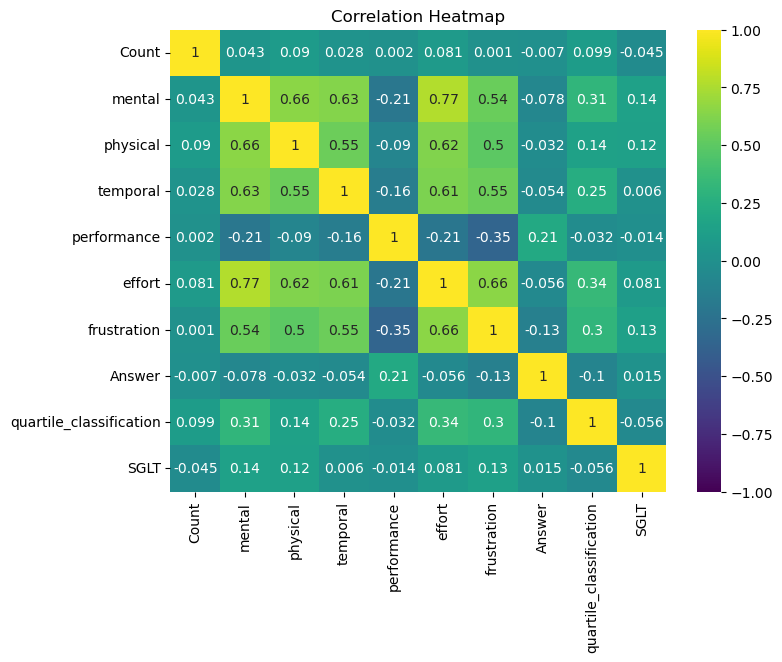

In [42]:
# Create a correlation heatmap
plt.figure(figsize=(8, 6))  # Set the size of the heatmap
sns.heatmap(correlation_matrix2, annot=True, cmap='viridis', vmin=-1, vmax=1)

# Add a title to the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [43]:
corr1 = df[factors].corr(method='pearson').round(2)

In [44]:
correlations3 = pd.DataFrame(df[factors].corrwith(df['Count'], method='spearman').round(3))
correlations3

,0
mental,0.043
physical,0.090
temporal,0.028
performance,0.002
effort,0.081
frustration,0.001
Answer,-0.007
quartile_classification,0.099
SGLT,-0.045


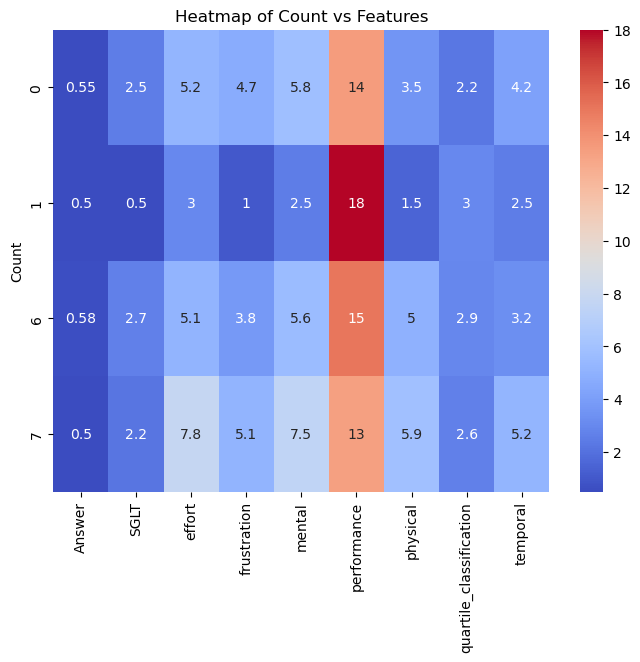

In [45]:
pivot_table = df.pivot_table(index="Count", values=factors)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title("Heatmap of Count vs Features")
plt.show()

### Regression analysis

In [46]:
X = df['Count'].values

factors = ['mental', 'physical', 'temporal', 'performance', 'effort', 'frustration', 'SGLT', 'Answer', 'quartile_classification']

# Creating a dictionary to store SVR models for each predictor
svr_models = {}

# Loop through each predictor and train an SVR model
for factor in factors:
    y = df[factor].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the SVR model
    svr_model = SVR(kernel='linear')
    svr_model.fit(X_train.reshape(-1, 1), y_train)

    # Store the trained model
    svr_models[factor] = svr_model

    # Predict on the test set
    y_pred = svr_model.predict(X_test.reshape(-1, 1))

    # Calculate and print the Mean Squared Error
    # accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Predictor: {factor}, Mean Squared Error: {mse}")

Predictor: mental, Mean Squared Error: 23.85951020408163
Predictor: physical, Mean Squared Error: 17.398591836734692
Predictor: temporal, Mean Squared Error: 23.9625
Predictor: performance, Mean Squared Error: 40.811806122448985
Predictor: effort, Mean Squared Error: 21.604438775510204
Predictor: frustration, Mean Squared Error: 27.193081632653065
Predictor: SGLT, Mean Squared Error: 1.5573673469387748
Predictor: Answer, Mean Squared Error: 0.38000000000000134
Predictor: quartile_classification, Mean Squared Error: 1.2397777777777779


In [47]:
X = df['Count'].values

# Predictor variable names
factors = ['mental', 'physical', 'temporal', 'performance', 'effort', 'frustration','SGLT', 'Answer', 'quartile_classification']

# Creating dictionaries to store evaluation metrics for each predictor
mse_scores = {}
r2_scores = {}
cv_scores = {}

# Loop through each predictor and train an SVR model
for factor in factors:
    y = df[factor].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the SVR model
    model = SVR(kernel='linear')
    model.fit(X_train.reshape(-1, 1), y_train)

    # Predict on the test set
    y_pred = model.predict(X_test.reshape(-1, 1))

    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate cross-validation score using 5-fold cross-validation
    cv_score = cross_val_score(model, X.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error')
    cv_score = -cv_score.mean()  # Convert negative MSE to positive

    mse_scores[factor] = mse
    r2_scores[factor] = r2
    cv_scores[factor] = cv_score

# Creating a DataFrame to store the results
results_svm = pd.DataFrame({'Factor': factors, 'MSE': mse_scores.values(), 'R2': r2_scores.values(), 'CV Score': cv_scores.values()})
results_svm = results_svm.round({'MSE': 3, 'R2': 3, 'CV Score': 3})

# Print the results
results_svm

,Factor,MSE,R2,CV Score
0,mental,23.860,-0.048,23.048
1,physical,17.399,-0.117,16.736
2,temporal,23.962,-0.168,23.908
3,performance,40.812,-0.109,42.200
4,effort,21.604,-0.024,23.937
5,frustration,27.193,-0.078,33.812
6,SGLT,1.557,-0.058,1.463
7,Answer,0.380,-0.529,0.376
8,quartile_classification,1.240,-0.013,1.224


In [48]:
X = df['Count'].values

# Predictor variable names
factors = ['mental', 'physical', 'temporal', 'performance', 'effort', 'frustration','SGLT', 'Answer', 'quartile_classification']

# Creating dictionaries to store evaluation metrics for each predictor
mse_scores = {}
r2_scores = {}
cv_scores = {}

# Loop through each predictor and train an SVR model
for factor in factors:
    y = df[factor].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the SVR model
    model = LinearRegression()
    model.fit(X_train.reshape(-1, 1), y_train)

    # Predict on the test set
    y_pred = model.predict(X_test.reshape(-1, 1))

    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate cross-validation score using 5-fold cross-validation
    cv_score = cross_val_score(model, X.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error')
    cv_score = -cv_score.mean()  # Convert negative MSE to positive

    mse_scores[factor] = mse
    r2_scores[factor] = r2
    cv_scores[factor] = cv_score

# Creating a DataFrame to store the results
results_reg = pd.DataFrame({'Factor': factors, 'MSE': mse_scores.values(), 'R2': r2_scores.values(), 'CV Score': cv_scores.values()})

# Print the results
results_reg


,Factor,MSE,R2,CV Score
0,mental,22.689955,0.003050,20.676155
1,physical,15.256569,0.020344,14.903449
2,temporal,20.649088,-0.006446,20.277668
3,performance,36.952118,-0.004203,37.922653
4,effort,20.949077,0.007136,22.828135
5,frustration,25.561735,-0.013607,28.254402
6,SGLT,1.470838,0.001128,1.333277
7,Answer,0.248708,-0.000459,0.255079
8,quartile_classification,1.222928,0.001182,1.251444


In [49]:
print(results_reg)
print(results_svm)

                    Factor        MSE        R2   CV Score
0                   mental  22.689955  0.003050  20.676155
1                 physical  15.256569  0.020344  14.903449
2                 temporal  20.649088 -0.006446  20.277668
3              performance  36.952118 -0.004203  37.922653
4                   effort  20.949077  0.007136  22.828135
5              frustration  25.561735 -0.013607  28.254402
6                     SGLT   1.470838  0.001128   1.333277
7                   Answer   0.248708 -0.000459   0.255079
8  quartile_classification   1.222928  0.001182   1.251444
                    Factor     MSE     R2  CV Score
0                   mental  23.860 -0.048    23.048
1                 physical  17.399 -0.117    16.736
2                 temporal  23.962 -0.168    23.908
3              performance  40.812 -0.109    42.200
4                   effort  21.604 -0.024    23.937
5              frustration  27.193 -0.078    33.812
6                     SGLT   1.557 -0.058     